In [41]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [36]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing import image

In [24]:
Image_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip = True,
                                  rotation_range=30,
                                  validation_split=0.2)

In [25]:
training_set = Image_datagen.flow_from_directory(r'D:\Face Mask detection\Dataset-20200810T011205Z-001\Dataset',
                                               batch_size =32,
                                               target_size=(150,150),
                                                subset= 'training')

Found 625 images belonging to 2 classes.


In [26]:
val_set = Image_datagen.flow_from_directory(r'D:\Face Mask detection\Dataset-20200810T011205Z-001\Dataset',
                                               batch_size =32,
                                               target_size=(150,150),
                                               subset = 'validation')

Found 156 images belonging to 2 classes.


In [27]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))

In [28]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 165888)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [29]:
history = model.fit(training_set,validation_data=val_set,epochs=10,batch_size=32)

Epoch 1/10
20/20 [==============================] - 4s 224ms/step - loss: 0.9335 - accuracy: 0.6512 - val_loss: 0.5779 - val_accuracy: 0.5705
Epoch 2/10
20/20 [==============================] - 4s 195ms/step - loss: 0.4002 - accuracy: 0.8320 - val_loss: 0.2053 - val_accuracy: 0.9359
Epoch 3/10
20/20 [==============================] - 4s 197ms/step - loss: 0.2138 - accuracy: 0.9168 - val_loss: 0.1505 - val_accuracy: 0.9487
Epoch 4/10
20/20 [==============================] - 4s 194ms/step - loss: 0.1505 - accuracy: 0.9488 - val_loss: 0.1156 - val_accuracy: 0.9487
Epoch 5/10
20/20 [==============================] - 4s 198ms/step - loss: 0.1235 - accuracy: 0.9584 - val_loss: 0.1388 - val_accuracy: 0.9487
Epoch 6/10
20/20 [==============================] - 4s 195ms/step - loss: 0.0965 - accuracy: 0.9632 - val_loss: 0.1379 - val_accuracy: 0.9615
Epoch 7/10
20/20 [==============================] - 4s 198ms/step - loss: 0.0942 - accuracy: 0.9664 - val_loss: 0.0935 - val_accuracy: 0.9615
Epoch 

In [30]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

NameError: name 'history' is not defined

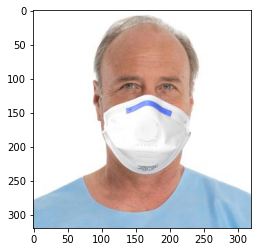

with mask


In [42]:
test_image = image.load_img(r'D:\Downloads\face-mask-dataset\Dataset\train\train\with_mask\mask42.jpeg',target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
img=mpimg.imread(r'D:\Downloads\face-mask-dataset\Dataset\train\train\with_mask\mask42.jpeg')
imgplot = plt.imshow(img)
plt.show()
training_set.class_indices
if (result[0][0]==1):
    prediction = 'with mask'
else:
    prediction = 'without mask'
    
print(prediction)

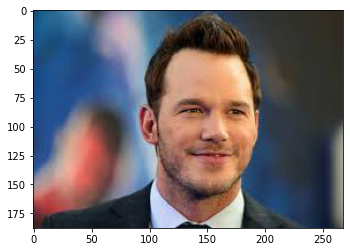

without mask


In [43]:
test_image = image.load_img(r'D:\Face Mask detection\images.jfif',target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
img=mpimg.imread(r'D:\Face Mask detection\images.jfif')
imgplot = plt.imshow(img)
plt.show()
training_set.class_indices
if (result[0][0]==1):
    prediction = 'with mask'
else:
    prediction = 'without mask'
    
print(prediction)

In [44]:
model.save('Face_mask_Detector_model.h5')